# Simple Linear Regresssion

In [55]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Read the dataset

In [56]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step -2 Basic Data Quality checks

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [58]:
df.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [59]:
df.duplicated().sum()

0

#### Understanding the relationship between RND and PROFIT
PROFIT ~ RND

<Axes: xlabel='RND', ylabel='PROFIT'>

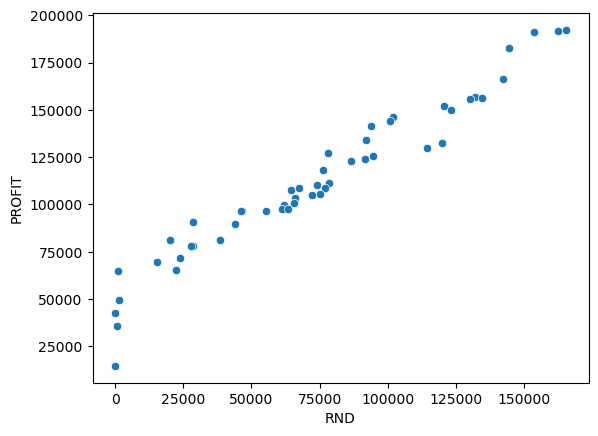

In [60]:
import seaborn as sns
sns.scatterplot(data= df, x="RND", y="PROFIT")

### Step 3 : Separate X (RND) and Y (PROFIT)

In [61]:
X= df[["RND"]]
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [62]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 : Fit the linear regression model

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

#### Checking R2 Score

In [64]:
model.score(X, Y)

0.9465353160804392

#### Coefficient and Intercept of Line

In [65]:
model.coef_

array([[0.85429137]])

In [66]:
model.intercept_

array([49032.89914125])

##### PROFIT_est = 0.8542.9*RND + 49032.89

### Step 5 : Model Evaluation 
1. Mean Square Error(MSE)
2. Root Mean Square Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score

In [67]:
y_pred = model.predict(X)
y_pred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [68]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [69]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(Y, y_pred)
print (f"Mean Squared Error : {mse :.2f}")

Mean Squared Error : 85120931.33


In [70]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y, y_pred)
print (f"Root Mean Squared Error is : {rmse :.2f}")

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (c:\Users\chand\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [71]:
rmse = mse**(1/2)      ## this is another way to calculate RMSE ##
rmse

9226.100548285232

In [72]:
from sklearn.metrics import mean_absolute_error
mea = mean_absolute_error(Y, y_pred)
print(f"Mean Absolute Error is  : {mea: .2f}")

Mean Absolute Error is  :  6910.98


In [73]:
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(Y, y_pred)
print(f"Mean Absolute Percentage Error is : {mape: .2f}")

Mean Absolute Percentage Error is :  0.11


In [74]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, y_pred)
print(f"R2 Score for this model is : {r2:.4f}")

R2 Score for this model is : 0.9465


<Axes: xlabel='RND', ylabel='PROFIT'>

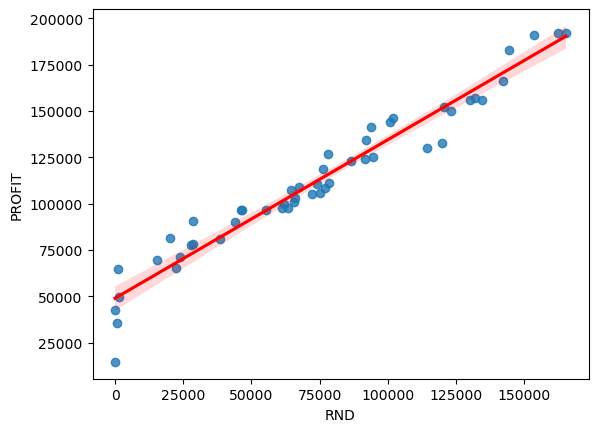

In [75]:
sns.regplot(data = df, x="RND", y = "PROFIT", line_kws={"color":"red"})

### Out of sample prediction

In [76]:
rnd = 2_00_00
profit_pred = model.predict([[rnd]])
print(f"For given rnd: {rnd}, estimated profit is : {profit_pred}")

For given rnd: 20000, estimated profit is : [[66118.72656003]]
